In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


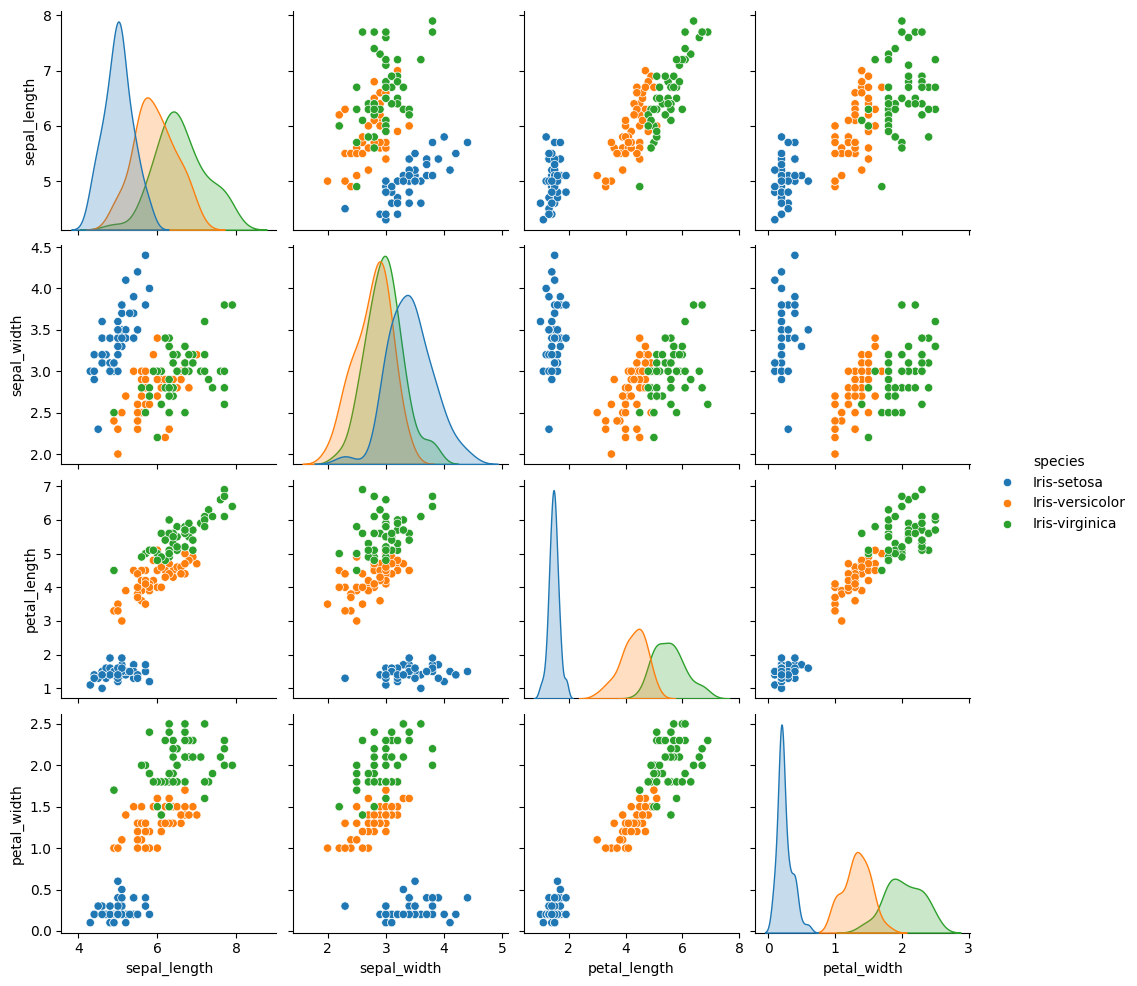

In [ ]:
# Load the Iris dataset from the provided CSV file
file_path = '/content/drive/MyDrive/IRIS.csv'
iris_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(iris_data.head())

# Visualize the dataset
sns.pairplot(iris_data, hue='species')
plt.show()

In [ ]:
# Encode the target variable (species)
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

# Split the data into features (X) and target (y)
X = iris_data.drop(columns='species')
y = iris_data['species']

Training set shape: (120, 4)
Testing set shape: (30, 4)


<ipython-input-12-504a72b00d1d>:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='plasma', edgecolor='k', s=50, marker='x', label='Testing Set')


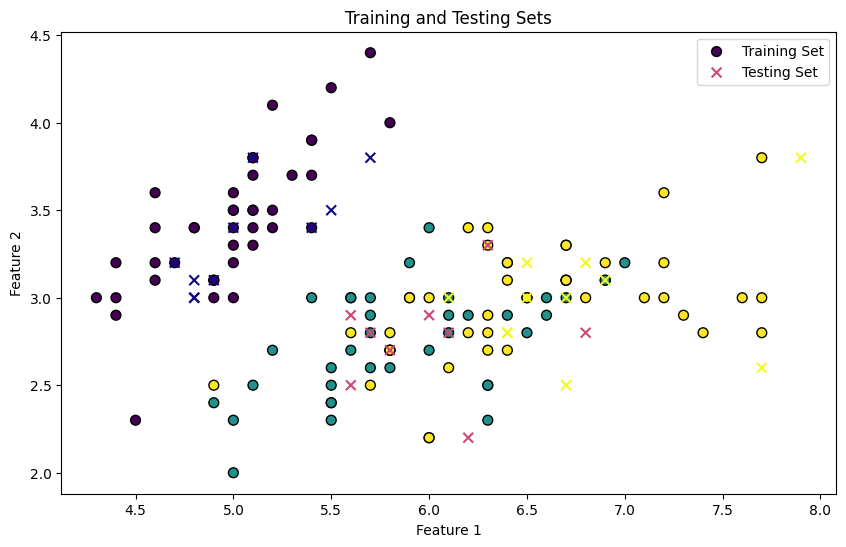

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Visualize the split
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50, label='Training Set')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='plasma', edgecolor='k', s=50, marker='x', label='Testing Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Training and Testing Sets')
plt.show()

In [ ]:
# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


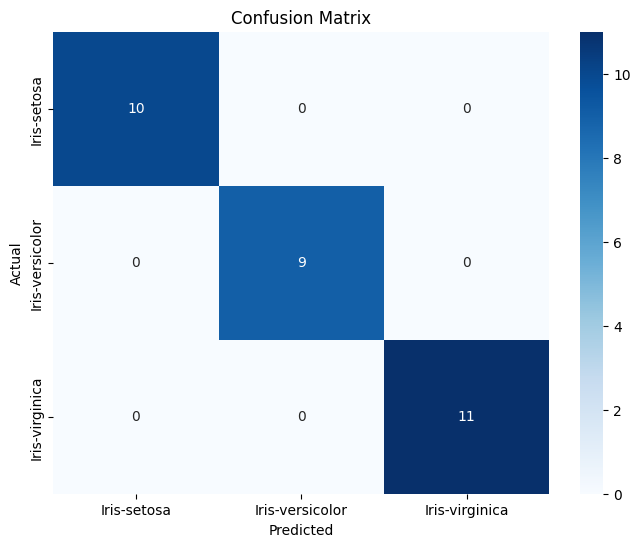

In [ ]:
# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_str)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

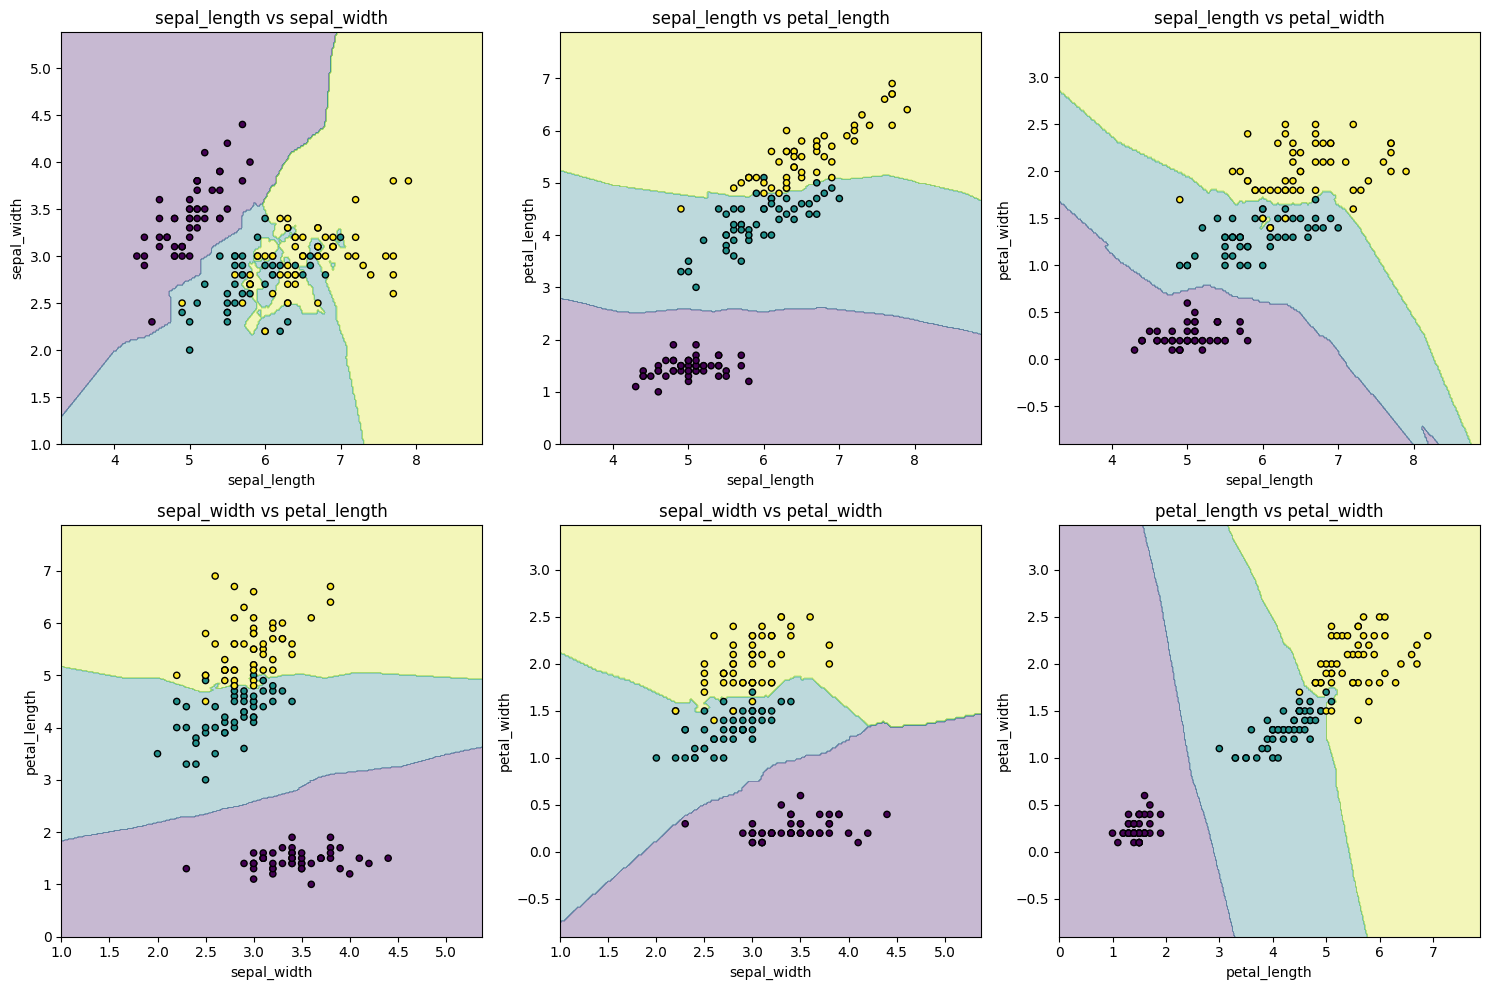

In [ ]:
# Visualizing the decision boundaries (for 2 features)
def plot_decision_boundaries(X, y, model, ax, title):
    # Define the mesh grid for plotting
    h = .02  # step size in the mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training points
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', s=20)
    ax.set_title(title)
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])

# We can only plot decision boundaries for 2 features, so we will take combinations of features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

features_pairs = [
    ("sepal_length", "sepal_width"),
    ("sepal_length", "petal_length"),
    ("sepal_length", "petal_width"),
    ("sepal_width", "petal_length"),
    ("sepal_width", "petal_width"),
    ("petal_length", "petal_width"),
]

for ax, (feat1, feat2) in zip(axes.flatten(), features_pairs):
    X_pair = X[[feat1, feat2]]
    model = KNeighborsClassifier(n_neighbors=3).fit(X_pair, y)
    plot_decision_boundaries(X_pair, y, model, ax, f"{feat1} vs {feat2}")

plt.tight_layout()
plt.show()